In [1]:
import imutils
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
import numpy as np
import argparse
import time
import cv2
import keras
from Fun_to_prepare_data import * 



In [2]:
import imutils
def sliding_window(image, step, ws):
    # slide a window across the image
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            # yield the current window
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [3]:
def image_pyramid(image, scale=1.5, minSize=(224, 224)):
    # yield the original image
    yield image
    # keep looping over the image pyramid
    while True:
        # compute the dimensions of the next image in the pyramid
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image

In [4]:
def inputs(imagen):
    a=resize_image(imagen,(64,64))
    a=np.asarray(a)
    a= a.astype('float32') / 255
    return a

In [5]:
WIDTH = 1300
PYR_SCALE = 1.5
WIN_STEP = 20
ROI_SIZE = (350,390)
INPUT_SIZE = (64, 64)

In [6]:
model = keras.models.load_model('../weights/model_full')

(1390, 1300, 3)
(1390, 1300, 3)


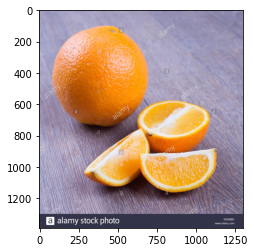

In [7]:
orig = cv2.imread("../../../../Desktop/frutilla.jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(orig)
print(orig.shape)
orig = imutils.resize(orig, width=WIDTH)
plt.imshow(orig)
print(orig.shape)
(H, W) = orig.shape[:2]

In [8]:
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

In [9]:
a = next(pyramid)

In [10]:
rois = []
locs = []
start = time.time()

In [11]:
start = time.time()
for image in pyramid:
    scale = W / float(image.shape[1])
    c = sliding_window(image, WIN_STEP, ROI_SIZE)
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi= roi.astype('float32') / 255
        rois.append(roi)
        locs.append((x, y, x + w, y + h))
end = time.time()
print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(
    end - start))

[INFO] looping over pyramid/windows took 0.16998 seconds


In [12]:
locs[162]

(180, 180, 705, 765)

In [13]:
rois = np.array(rois, dtype="float32")

In [14]:
type(rois)

numpy.ndarray

In [15]:
print("[INFO] classifying ROIs...")
start = time.time()
preds = model.predict(rois)
end = time.time()
print("[INFO] classifying ROIs took {:.5f} seconds".format(
    end - start))

[INFO] classifying ROIs...
[INFO] classifying ROIs took 1.11555 seconds


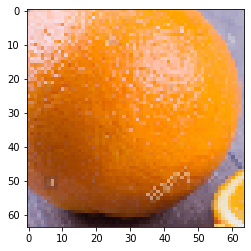

In [16]:
plt.imshow(rois[162])

In [17]:
rois[215].shape

(64, 64, 3)

In [18]:
#predicciones=[]
#for i in rois:
#    print(i)
#    predicciones.append(model.predict(np.expand_dims(i,axis=0))[0])

In [19]:
#
#for i,x in enumerate(predicciones):
#    print(i)
#    print(x)

In [20]:
#max(preds)
#preds.index(max(preds))
#i, j = np.where(np.isclose(a, max(preds)))
#i, = np.where(np.isclose(a, max(preds)))

In [21]:
#for i,x in enumerate(preds):
#    print(i)
#    print(x)

In [22]:
# loop over the predictions
for (i, p) in enumerate(preds):
	# grab the prediction information for the current ROI
    print(p)
    break


[0.86813927]


In [23]:
('n07932039', 'eggnog', 0.4728203)

('n07932039', 'eggnog', 0.4728203)

In [24]:
naranjaid="naranja"
naranja_label="naranja"
preds[0][0]

0.86813927

In [25]:
preds_map=[]

In [26]:
for x,i in enumerate(preds):
    preds_map.append((naranjaid,naranja_label,preds[x][0]))

In [27]:
preds_map

[('naranja', 'naranja', 0.86813927),
 ('naranja', 'naranja', 0.89124787),
 ('naranja', 'naranja', 0.95677996),
 ('naranja', 'naranja', 0.9651246),
 ('naranja', 'naranja', 0.9838991),
 ('naranja', 'naranja', 0.993044),
 ('naranja', 'naranja', 0.9984789),
 ('naranja', 'naranja', 0.9984725),
 ('naranja', 'naranja', 0.9991946),
 ('naranja', 'naranja', 0.9973091),
 ('naranja', 'naranja', 0.98572826),
 ('naranja', 'naranja', 0.9407054),
 ('naranja', 'naranja', 0.81594145),
 ('naranja', 'naranja', 0.42770213),
 ('naranja', 'naranja', 0.3654064),
 ('naranja', 'naranja', 0.4165133),
 ('naranja', 'naranja', 0.43394864),
 ('naranja', 'naranja', 0.26255518),
 ('naranja', 'naranja', 0.0325903),
 ('naranja', 'naranja', 0.0058540404),
 ('naranja', 'naranja', 0.004698664),
 ('naranja', 'naranja', 0.015719056),
 ('naranja', 'naranja', 0.02144751),
 ('naranja', 'naranja', 0.019176394),
 ('naranja', 'naranja', 0.020310432),
 ('naranja', 'naranja', 0.02609846),
 ('naranja', 'naranja', 0.95857316),
 ('nara

In [28]:
labels = {}
# loop over the predictions
for (i, p) in enumerate(preds_map):
	# grab the prediction information for the current ROI
	(imagenetID, label, prob) = p
	# filter out weak detections by ensuring the predicted probability
	# is greater than the minimum probability
	if prob >= 0.99:
		# grab the bounding box associated with the prediction and
		# convert the coordinates
		box = locs[i]
		# grab the list of predictions for the label and add the
		# bounding box and probability to the list
		L = labels.get(label, [])
		L.append((box, prob))
		labels[label] = L

In [29]:
# loop over the labels for each of detected objects in the image
for label in labels.keys():
	# clone the original image so that we can draw on it
	print("[INFO] showing results for '{}'".format(label))
	clone = orig.copy()
	# loop over all bounding boxes for the current label
	for (box, prob) in labels[label]:
		# draw the bounding box on the image
		(startX, startY, endX, endY) = box
		cv2.rectangle(clone, (startX, startY), (endX, endY),
			(0, 255, 0), 2)
	# show the results *before* applying non-maxima suppression, then
	# clone the image again so we can display the results *after*
	# applying non-maxima suppression
	cv2.imshow("Before", clone)
	clone = orig.copy()

[INFO] showing results for 'naranja'


In [30]:
clone = orig.copy()

In [ ]:
https://www.pyimagesearch.com/2020/06/22/turning-any-cnn-image-classifier-into-an-object-detector-with-keras-tensorflow-and-opencv/

In [ ]:
https://www.pyimagesearch.com/2020/07/06/region-proposal-object-detection-with-opencv-keras-and-tensorflow/

In [ ]:
https://www.pyimagesearch.com/2020/07/06/region-proposal-object-detection-with-opencv-keras-and-tensorflow/